In [5]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import os

In [6]:
#this function will convert the images to a numpy array, turn image to grayscale and convert the size of the image
# to a constant shape.
def process_image(path):
    img=cv2.imread(path)
    #plt.imshow(img)
    #print(img.shape)
    img=cv2.resize(img,(600,600))
    img=img/255.0
    #plt.imshow(img)
    return img

In [7]:
test_img_path= sorted(os.listdir('./document_dataset/test'))
test_data=[]
for i in test_img_path :
    test_data.append(process_image('./document_dataset/test/'+str(i)))

#### Applying a High Pass filter on the image 

In [15]:
def sharpen_image(img):
    sharpkernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
    image = cv2.filter2D(src=img,ddepth=-1, kernel=sharpkernel)
    return image
def high_pass_filter(img):
    hpkernel= np.array([[1/9,1/9,1/9],
                       [1/9,8/9,1/9],
                       [1/9,1/9,1/9]])
    image = cv2.filter2D(src=img,ddepth=-1, kernel=hpkernel)
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


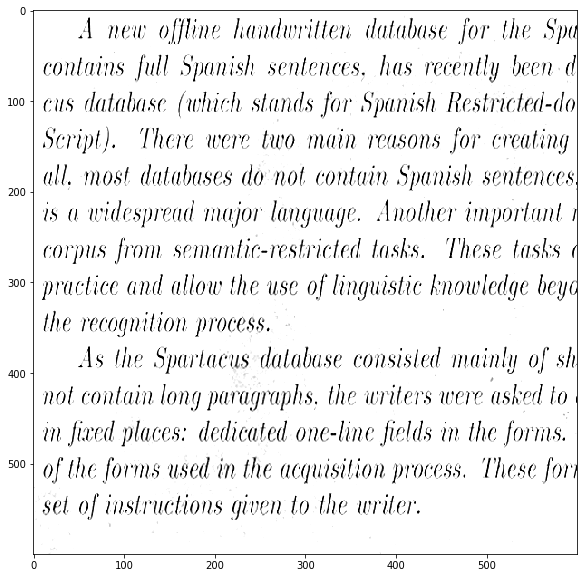

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(sharpen_image(high_pass_filter(test_data[20])))

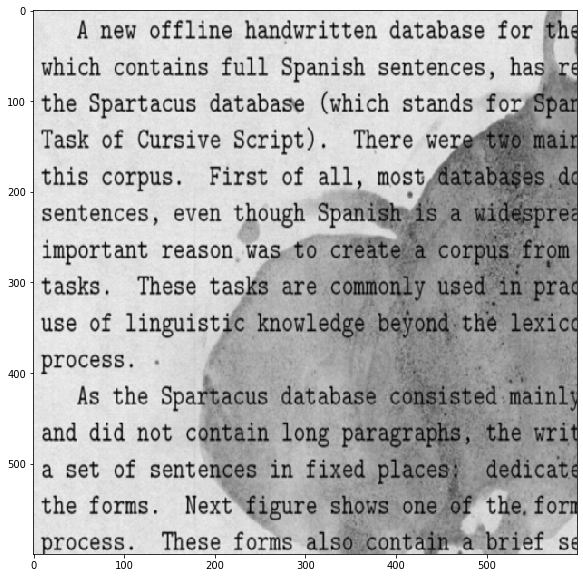

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(test_data[40])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


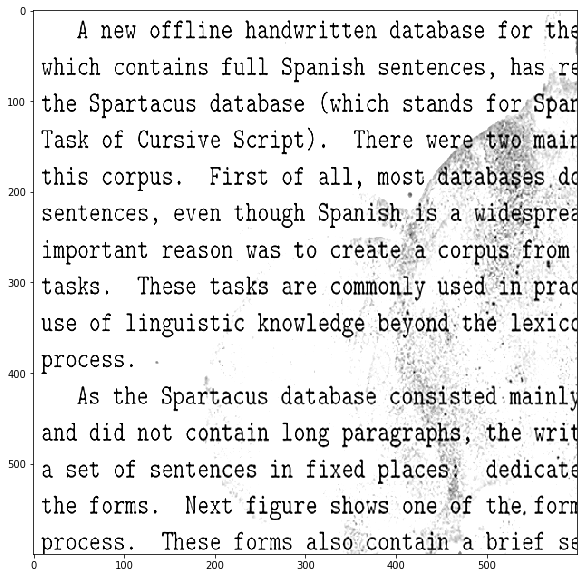

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(sharpen_image(high_pass_filter(test_data[40])))

#### Applying the Median filter along with Sharpening Filter

In [47]:
def get_median(arr):
    if len(arr)%2==1 :
        arr.sort()
        return arr[int(len(arr)/2)]
    else:
        arr.sort()
        return (arr[int(len(arr)/2)-1]+arr[int(len(arr)/2)])/2
get_median([2,7,2,5,3,4,10,9,8])

5

In [61]:
img=test_data[10]
filter=[[1,1,1],[1,0,1],[1,1,1]]
for k in range(3):
    for i in range(598):
        for j in range(598):
            temp=[img[i,j,k],img[i,j+1,k],img[i,j+2,k],img[i+1,j,k],img[i+1,j+1,k],img[i+1,j+2,k],img[i+2,j,k],img[i+2,j+1,k],
                 img[i+2,j+2,k]]
            x = sum(temp)/len(temp)
            img[i+1,j+1,k]=x

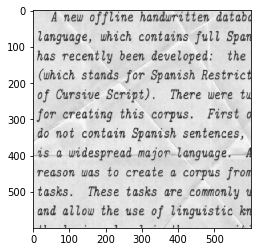

In [62]:
plt.imshow(img)

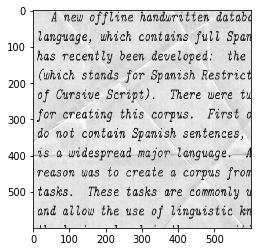

In [60]:
plt.imshow(test_data[10])

Median filtering was applied by calculating the median of 3x3 matrix across all the pixels of the image, but was not very effective, it was tested on 10 different images,the result of high pass filter was better than median filter. Now trying median filter on result of high pass filtering.

In [73]:
img=sharpen_image(high_pass_filter(test_data[40]))
filter=[[1,1,1],[1,0,1],[1,1,1]]
for k in range(3):
    for i in range(598):
        for j in range(598):
            temp=[img[i,j,k],img[i,j+1,k],img[i,j+2,k],img[i+1,j,k],img[i+1,j+1,k],img[i+1,j+2,k],img[i+2,j,k],img[i+2,j+1,k],
                 img[i+2,j+2,k]]
            x = get_median(temp)
            img[i+1,j+1,k]=x

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


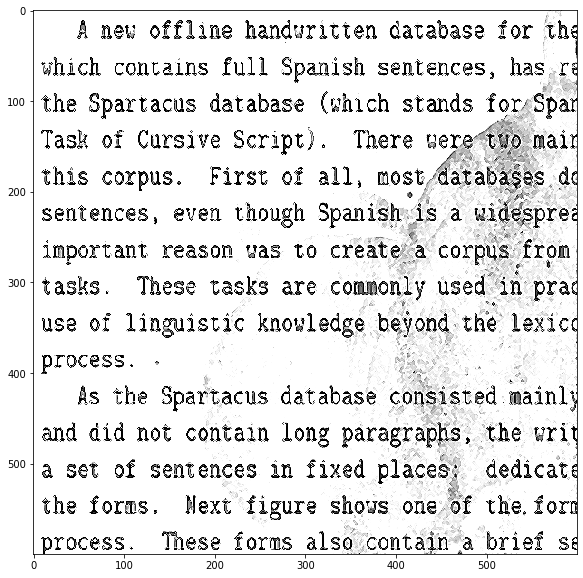

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(sharpen_image(img))